# Chapter 9 Spread Spectrum Modulation

## Example9.1 page 461

In [4]:
#Program to generate Maximum Length Pseudo Noise Sequence
#Period of PN Sequence N = 7

#Assign Initial value for PN generator
x0= 1#
x1= 0#
x2 =0#
x3 =0#
N = 7 # the period of the signal
for i in range(1,N+1):
  x3 =x2
  x2 =x1
  x1 = x0
  x0 =(x1^x3)
  print 'The PN sequence at step:',i
  x = [x1, x2, x3]
  print 'x=',x

m = [7,8,9,10,11,12,13,17,19]#
N = [2**mm-1 for mm in m]
print 'Table 9.1 Range of PN Sequence lengths'
print '_________________________________________________________'
print 'Length of shift register (m) =',m
print 'PN sequence Length (N) =',N
print '_________________________________________________________'

The PN sequence at step: 1
x= [1, 0, 0]
The PN sequence at step: 2
x= [1, 1, 0]
The PN sequence at step: 3
x= [1, 1, 1]
The PN sequence at step: 4
x= [0, 1, 1]
The PN sequence at step: 5
x= [1, 0, 1]
The PN sequence at step: 6
x= [0, 1, 0]
The PN sequence at step: 7
x= [0, 0, 1]
Table 9.1 Range of PN Sequence lengths
_________________________________________________________
Length of shift register (m) = [7, 8, 9, 10, 11, 12, 13, 17, 19]
PN sequence Length (N) = [127, 255, 511, 1023, 2047, 4095, 8191, 131071, 524287]
_________________________________________________________


## Example9.2 page 462

The PN sequence at step : 1
x= [1, 0, 0]
The PN sequence at step : 2
x= [1, 1, 0]
The PN sequence at step : 3
x= [1, 1, 1]
The PN sequence at step : 4
x= [0, 1, 1]
The PN sequence at step : 5
x= [1, 0, 1]
The PN sequence at step : 6
x= [0, 1, 0]
The PN sequence at step : 7
x= [0, 0, 1]
Output Sequence :  [0, 0, 1, 1, 1, 0, 1]
Output Sequence levels : [-1, -1, 1, 1, 1, -1, 1]
Number of 1s in the given PN sequence :  4
Number of 0s in the given PN sequence : 3
Property 1 (Balance property) is satisified


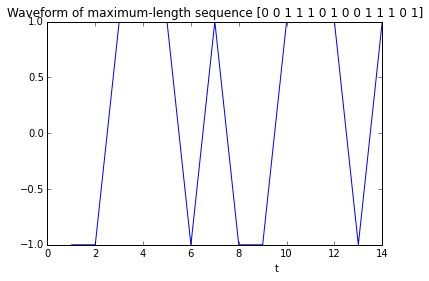

In [26]:
from numpy import corrcoef as corr
%matplotlib inline
from matplotlib.pyplot import plot,xlabel,ylabel,title,show

#Period of PN Sequence N = 7
#Properites of maximum-length sequence

#Assign Initial value for PN generator
x0= 1#
x1= 0#
x2 =0#
x3 =0#
N = 7 #the period of the signal
one_count = 0
zero_count = 0
C=[]
C_level=[]
t=[]
for i in range(1,N+1):
  x3 =x2#
  x2 =x1#
  x1 = x0#
  x0 =(x1^x3)
  print 'The PN sequence at step :',i
  x = [x1 ,x2 ,x3]
  print 'x=',x
  C.append(x3)
  if(C[i-1]==1):
    C_level.append(1)
    one_count = one_count+1
  elif(C[i-1]==0):
    C_level.append(-1)
    zero_count = zero_count+1
  
print 'Output Sequence : ',C #refer equation 9.4
print 'Output Sequence levels :',C_level#refer equation 9.5
if(zero_count < one_count):
  print 'Number of 1s in the given PN sequence : ',one_count
  print 'Number of 0s in the given PN sequence :',zero_count
  print 'Property 1 (Balance property) is satisified'

Rc_tuo = corr(C_level,rowvar=N)
t = range(1,2*len(C_level)+1)
plot(t,C_level+C_level)
xlabel('                                        t')
title('Waveform of maximum-length sequence [0 0 1 1 1 0 1 0 0 1 1 1 0 1]')
show()

## Example9.3 page 468

In [28]:
from math import log,log10
def log2(x):
    return log(x,2)

Tb = 4.095*10**-3##Information bit duration
Tc = 1*10**-6##PN chip duration
PG = Tb/Tc##Processing gain
print 'The processing gain is:',PG
N = PG# #PN sequence length
m = log2(N+1)##feedback shift register length
print 'The required PN sequence is:',N
print 'The feedback shift register length:',m
Eb_No = 10##Energy to noise density ratio
J_P = PG/Eb_No##Jamming Margin
print 'Jamming Margin in dB:',10*log10(J_P)

The processing gain is: 4095.0
The required PN sequence is: 4095.0
The feedback shift register length: 12.0
Jamming Margin in dB: 26.122539061


## Example9.4 page 469

In [31]:
#Slow and Fast Frequency Hopping
K =2# #number of bits per symbol
M = 2**K# #Number of MFSK tones
N = 2**M-1##Period of the PN sequence
k = 3# #length of PN sequence per hop
print 'number of bits per symbol K =',K
print 'Number of MFSK tones M=',M
print 'Period of the PN sequence N =',N
print 'length of PN sequence per hop k =',k
print 'Total number of frequency hops =',2**k

number of bits per symbol K = 2
Number of MFSK tones M= 4
Period of the PN sequence N = 15
length of PN sequence per hop k = 3
Total number of frequency hops = 8


## Example9.5 page 470

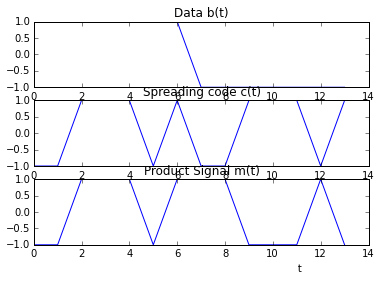

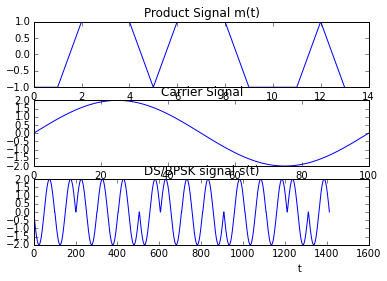

In [3]:
from numpy import ones,sin,arange,hstack,nditer,pi
%matplotlib inline
from matplotlib.pyplot import plot,subplot,xlabel,ylabel,title,show


#Figure 9.4:Generation of waveforms in DS/BPSK spread spectrum transmitter
t = range(0,13+1)
N = 7#
wt = arange(0,0.01+1,0.01)
bt = hstack([[1*xx for xx in ones(N)],[-1*yy for yy in ones(N)]])
ct = [0,0,1,1,1,0,1,0,0,1,1,1,0,1]
ct_polar = [-1,-1,1,1,1,-1,1,-1,-1,1,1,1,-1,1]
mt = [a*b for a,b in nditer([bt,ct_polar])]
Carrier = [2*sin(wtt*2*pi) for wtt in wt]

st = []#
for i in range(0,len(mt)):
  st = st+[mt[i]*Cr for Cr in Carrier]

subplot(3,1,1)
plot(t,bt)
xlabel('                                                               t')
title('Data b(t)')
subplot(3,1,2)
plot(t,ct_polar)
xlabel('                                                                t')
title('Spreading code c(t)')
subplot(3,1,3)
plot(t,mt)
xlabel('                                                               t')
title('Product Signal m(t)')
show()
subplot(3,1,1)
plot(t,mt)
xlabel('                                                                t')
title('Product Signal m(t)')
subplot(3,1,2)
plot(Carrier)
xlabel('                                                               t')
title('Carrier Signal')
subplot(3,1,3)
plot(st)
xlabel('                                                               t')
title('DS/BPSK signal s(t)')
show()